In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

from IPython.display import display
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from math import log10

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5

In [2]:
with open(f'{Project}/Results/Tables/GSEA/v20240208/adi_logRD_temporal_GOCC.pickle',"rb") as fr:
    total_data = pickle.load(fr)

raw_data = total_data
for cond in raw_data:
    raw_data[cond]['name'] = [x[5:] for x in raw_data[cond]['Term']]
    raw_data[cond]['name'] = raw_data[cond]['name'].str.replace('_', ' ').str.capitalize()

display(raw_data['8'])

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes,N,name
0,prerank,GOCC_INNER_MITOCHONDRIAL_MEMBRANE_PROTEIN_COMPLEX,-0.61053,-2.651371,0.0,0.0,0.0,86/141,19.64%,Chchd3;Atp5g1;Cox8b;Uqcrb;mt-Cytb;Ndufa4;Timm1...,11808,Inner mitochondrial membrane protein complex
1,prerank,GOCC_RESPIRASOME,-0.642963,-2.592375,0.0,0.0,0.0,59/89,19.74%,Cox8b;Uqcrb;mt-Cytb;Ndufa4;Ndufb7;Uqcc3;Cox7b;...,11808,Respirasome
2,prerank,GOCC_NADH_DEHYDROGENASE_COMPLEX,-0.701978,-2.517026,0.0,0.0,0.0,34/48,16.84%,Ndufa4;Ndufb7;Ndufb4;mt-Nd5;Ndufa13;Ndufs6;mt-...,11808,Nadh dehydrogenase complex
3,prerank,GOCC_MITOCHONDRIAL_PROTEIN_CONTAINING_COMPLEX,-0.43588,-2.07318,0.0,0.005498,0.016333,134/285,21.18%,Chchd3;Atp5g1;Cox8b;Uqcrb;mt-Cytb;Ndufa4;Mrpl3...,11808,Mitochondrial protein containing complex
4,prerank,GOCC_SMALL_NUCLEAR_RIBONUCLEOPROTEIN_COMPLEX,-0.533705,-2.035885,0.001093,0.007301,0.026,25/66,18.95%,Prpf6;Prpf40b;Lsm7;Lsm2;Sf3b2;Snrpb2;Sart1;Lsm...,11808,Small nuclear ribonucleoprotein complex
...,...,...,...,...,...,...,...,...,...,...,...,...
423,prerank,GOCC_DNA_REPAIR_COMPLEX,0.206549,0.569173,0.964516,0.994722,1.0,7/21,25.76%,Dclre1c;Phf21a;Rcor1;Trp53bp1;Fanci;Ascc1;Xrcc5,11808,Dna repair complex
424,prerank,GOCC_STEREOCILIUM,-0.179372,-0.566887,0.982759,0.99252,1.0,10/26,31.68%,Pafah1b1;Fchsd2;Myo7a;Morn4;Ripor2;Cib2;Rdx;At...,11808,Stereocilium
425,prerank,GOCC_PRESYNAPTIC_ACTIVE_ZONE_MEMBRANE,-0.159307,-0.550709,0.992087,0.989717,1.0,10/38,24.60%,Stx3;Stx1b;Kcnma1;Syt11;Grin1;Stx1a;Cacna2d1;G...,11808,Presynaptic active zone membrane
426,prerank,GOCC_EXTRINSIC_COMPONENT_OF_SYNAPTIC_VESICLE_M...,0.199473,0.512024,0.978677,0.998912,1.0,3/16,19.18%,Atp6v1a;Atp6v1h;Snap29,11808,Extrinsic component of synaptic vesicle membrane


---

In [3]:
import csv

gmt_path = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Data_Library/GSEA/gmt/m5.go.cc.v2023.1.Mm.symbols.gmt'

gmt = {}
rf = open(gmt_path)
reader = csv.reader(rf, delimiter='\t')
for line in reader:
    gmt[line[0]] = line[2:]
rf.close()

In [4]:
CHIP = pd.read_csv('/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Data_Library/GSEA/chip/Mouse_Ensembl_Gene_ID_MSigDB.v2023.2.Mm.chip', sep='\t', usecols=['Probe Set ID','Gene Symbol']).rename(columns={'Probe Set ID':'gene_id', 'Gene Symbol':'gene_name'})
# display(CHIP)

In [5]:
MitoCarta3_file = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Data_Library/MITOCARTA3.0/Mouse.MitoCarta3.0.xls'
MitoCarta = pd.read_excel(MitoCarta3_file, 'A Mouse MitoCarta3.0')
MitoPW    = pd.read_excel(MitoCarta3_file, 'C MitoPathways')

name2ID = MitoCarta[['Symbol','EnsemblGeneID']].set_index('Symbol')['EnsemblGeneID'].to_dict()

MitoPW['PW level'] = MitoPW['MitoPathway Hierarchy'].str.split('>').str.len()
MitoPW['gene_ids'] = ''
for i in range(len(MitoPW)):
    for gene in MitoPW.iloc[i,:]['Genes'].split(', '):
        if type(name2ID[gene]) == float : continue
        MitoPW['gene_ids'][i] += name2ID[gene].replace('|',',') + ','
    MitoPW['gene_ids'][i] = MitoPW['gene_ids'][i][:-1]
MitoPW = MitoPW.set_index('MitoPathway',drop=True)

/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_10673/3320499072.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MitoPW['gene_ids'][i] += name2ID[gene].replace('|',',') + ','
/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_10673/3320499072.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MitoPW['gene_ids'][i] = MitoPW['gene_ids'][i][:-1]


In [6]:
OXPHOS = pd.DataFrame({'gene_id' : MitoPW.loc['OXPHOS subunits','gene_ids'].split(',')})
OXPHOS = pd.merge(CHIP, OXPHOS, on='gene_id')

# OXPHOS = pd.merge(OXPHOS, pd.DataFrame({'gene_name':['Ndufab1','Ndufa7']}), on='gene_name', how='outer', indicator=True) # Ndufab1 and Ndufa7 are the subunits of Complex I and mitochondrial ribosome
# OXPHOS = OXPHOS[OXPHOS['_merge']=='left_only'][['gene_id']]

display(OXPHOS)

,gene_id,gene_name
0,ENSMUSG00000000088,Cox5a
1,ENSMUSG00000000171,Sdhd
2,ENSMUSG00000000399,Ndufa9
3,ENSMUSG00000000563,Atp5pb
4,ENSMUSG00000002379,Ndufa11
...,...,...
97,ENSMUSG00000064370,mt-Cytb
98,ENSMUSG00000065947,mt-Nd4l
99,ENSMUSG00000071014,Ndufb6
100,ENSMUSG00000071528,Atp5md


---

In [7]:
RD_avglogFC = pd.read_csv(f'{Project}/Results/Tables/CPM_RD_calculation/v20221217/adi_RD_avg_log2FC.tsv', sep='\t').drop(columns='gene_name')

display(RD_avglogFC)

,gene_id,D4,D8
0,ENSMUSG00000033845,-0.311108,-0.382188
1,ENSMUSG00000025903,0.143887,-0.212839
2,ENSMUSG00000033813,0.151689,0.189858
3,ENSMUSG00000033793,0.269876,0.283882
4,ENSMUSG00000025907,0.088801,-0.326082
...,...,...,...
11805,ENSMUSG00000064360,-0.227778,-2.407071
11806,ENSMUSG00000064363,-1.022871,-1.317163
11807,ENSMUSG00000064367,-0.418699,-0.569325
11808,ENSMUSG00000064368,-0.609004,-0.318614


In [8]:
data_dict = {}
for day in raw_data:
    tmp = raw_data[day][['Term','NES','FDR q-val','Tag %']]
    tmp['GS size'] = tmp['Tag %'].str.split('/').str[1].astype(int)
    tmp = tmp.replace(0, 0.0002)
    tmp['-log10FDR'] = -np.log10(tmp['FDR q-val'])
    tmp = tmp.drop(columns=['Tag %','FDR q-val'])

    avg_RD_logFC = []
    for T in tmp['Term']:
        avg_RD_logFC.append((pd.merge(RD_avglogFC, pd.merge(CHIP, pd.DataFrame({'gene_name':gmt[T]}), on='gene_name'), on='gene_id')[f'D{day}']).mean())
    tmp[f'avg_RD_logFC_{day}d'] = avg_RD_logFC

    data_dict[day] = tmp.rename(columns={'NES':f'NES_{day}d', '-log10FDR':f'-log10FDR_{day}d'})


plot_data = pd.merge(data_dict['4'], data_dict['8'], on=['Term','GS size']).sort_values('GS size', ascending=False)
display(plot_data)

/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_10673/4150022371.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['GS size'] = tmp['Tag %'].str.split('/').str[1].astype(int)
/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_10673/4150022371.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['GS size'] = tmp['Tag %'].str.split('/').str[1].astype(int)


,Term,NES_4d,GS size,-log10FDR_4d,avg_RD_logFC_4d,NES_8d,-log10FDR_8d,avg_RD_logFC_8d
167,GOCC_NUCLEAR_OUTER_MEMBRANE_ENDOPLASMIC_RETICU...,1.221920,494,0.400379,0.052575,0.865752,0.020150,-0.006844
333,GOCC_POLYMERIC_CYTOSKELETAL_FIBER,-0.899539,491,0.054080,0.035470,-1.154157,0.223062,-0.029729
118,GOCC_DENDRITIC_TREE,1.326247,486,0.499119,0.118066,0.992295,0.083382,0.060351
259,GOCC_VESICLE_MEMBRANE,1.032862,486,0.209813,0.031581,1.148674,0.094308,0.015595
183,GOCC_VACUOLE,1.176478,482,0.352936,0.049541,1.161376,0.110800,0.018087
...,...,...,...,...,...,...,...,...
395,GOCC_NBAF_COMPLEX,-0.753329,15,0.008820,-0.054601,-1.026922,0.102223,-0.089869
313,GOCC_CELL_BODY_MEMBRANE,0.913293,15,0.095195,0.123920,1.365848,0.309975,0.254642
35,GOCC_PRESPLICEOSOME,-1.763797,15,1.385508,-0.154414,-1.877820,1.804983,-0.264680
277,GOCC_ACROSOMAL_MEMBRANE,-0.997223,15,0.122847,0.040693,0.808663,0.011085,0.020132


In [9]:
NoSig_plot_data = plot_data[(plot_data['-log10FDR_4d']<1)&(plot_data['-log10FDR_8d']<1)]
Sig_plot_data = plot_data[(plot_data['-log10FDR_4d']>1)|(plot_data['-log10FDR_8d']>1)]

display(NoSig_plot_data, Sig_plot_data)

,Term,NES_4d,GS size,-log10FDR_4d,avg_RD_logFC_4d,NES_8d,-log10FDR_8d,avg_RD_logFC_8d
167,GOCC_NUCLEAR_OUTER_MEMBRANE_ENDOPLASMIC_RETICU...,1.221920,494,0.400379,0.052575,0.865752,0.020150,-0.006844
333,GOCC_POLYMERIC_CYTOSKELETAL_FIBER,-0.899539,491,0.054080,0.035470,-1.154157,0.223062,-0.029729
118,GOCC_DENDRITIC_TREE,1.326247,486,0.499119,0.118066,0.992295,0.083382,0.060351
259,GOCC_VESICLE_MEMBRANE,1.032862,486,0.209813,0.031581,1.148674,0.094308,0.015595
183,GOCC_VACUOLE,1.176478,482,0.352936,0.049541,1.161376,0.110800,0.018087
...,...,...,...,...,...,...,...,...
325,GOCC_HIGH_DENSITY_LIPOPROTEIN_PARTICLE,-0.907127,15,0.043299,-0.253974,-1.316847,0.431484,-0.434709
379,GOCC_SECONDARY_LYSOSOME,-0.801097,15,0.019355,-0.020690,0.983538,0.075121,0.159288
395,GOCC_NBAF_COMPLEX,-0.753329,15,0.008820,-0.054601,-1.026922,0.102223,-0.089869
313,GOCC_CELL_BODY_MEMBRANE,0.913293,15,0.095195,0.123920,1.365848,0.309975,0.254642


,Term,NES_4d,GS size,-log10FDR_4d,avg_RD_logFC_4d,NES_8d,-log10FDR_8d,avg_RD_logFC_8d
45,GOCC_ANCHORING_JUNCTION,1.711176,437,1.204859,0.156942,1.195285,0.139849,0.094907
44,GOCC_CELL_CELL_JUNCTION,1.712196,327,1.187345,0.178881,1.288442,0.226465,0.124022
11,GOCC_EXTERNAL_ENCAPSULATING_STRUCTURE,1.934291,317,1.266526,0.200621,0.875793,0.021970,0.095506
3,GOCC_MITOCHONDRIAL_PROTEIN_CONTAINING_COMPLEX,-2.532720,285,3.698970,-0.243948,-2.073180,2.259827,-0.243848
46,GOCC_APICAL_PART_OF_CELL,1.688924,273,1.133163,0.142254,1.183349,0.124604,0.044270
...,...,...,...,...,...,...,...,...
27,GOCC_MRNA_CLEAVAGE_AND_POLYADENYLATION_SPECIFI...,1.828356,16,1.412540,0.111649,1.291576,0.225603,0.175061
42,GOCC_MHC_PROTEIN_COMPLEX,-1.720215,15,1.325636,-0.306967,-1.958728,2.014315,-0.704353
34,GOCC_GLYCOPROTEIN_COMPLEX,1.766362,15,1.319244,0.235888,0.928365,0.037929,0.027931
35,GOCC_PRESPLICEOSOME,-1.763797,15,1.385508,-0.154414,-1.877820,1.804983,-0.264680


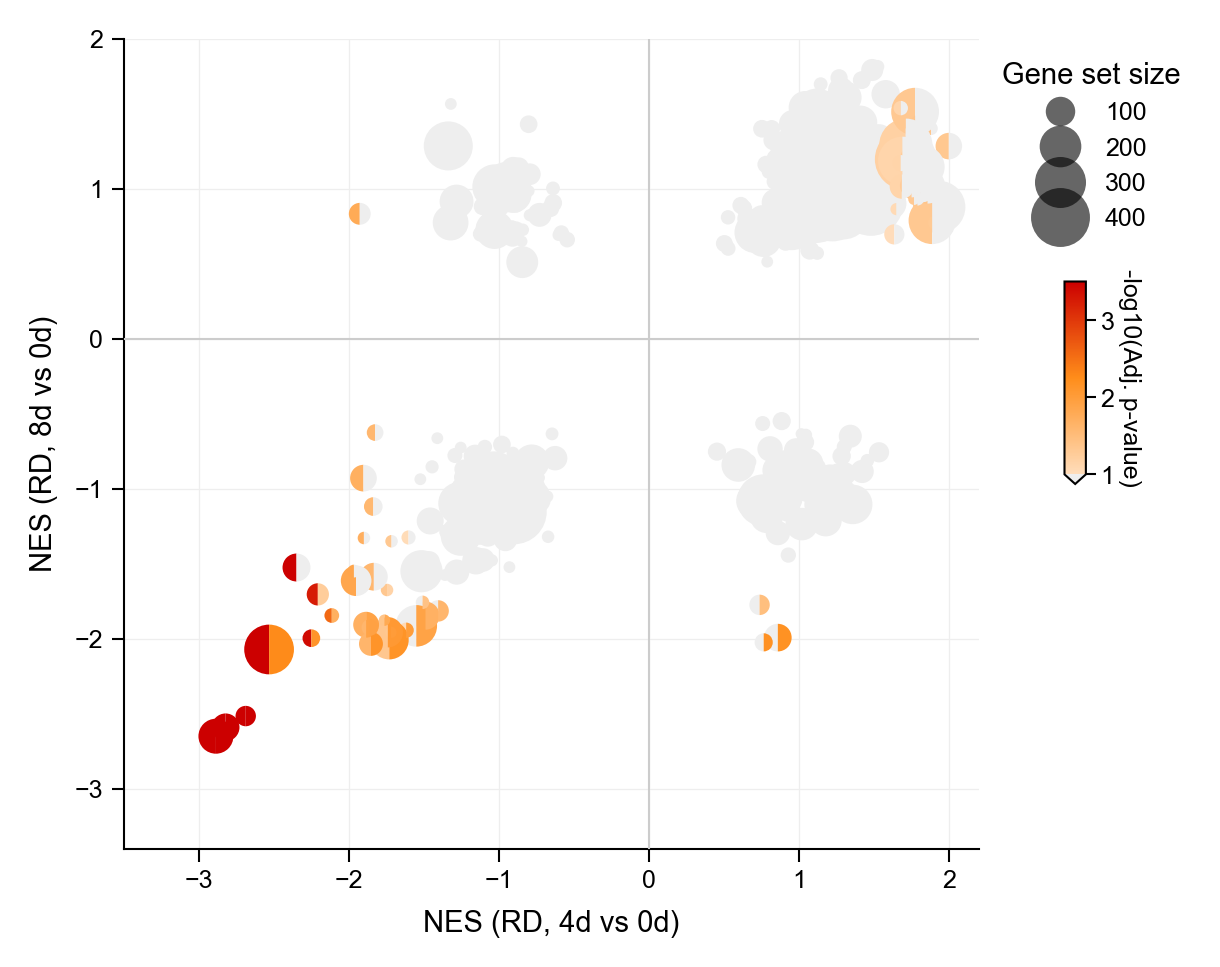

In [96]:
dot_size_factor = 0.5

sF = 1.5 # Size factor
wgap = 0.1
hgap = 0.1
nrow, ncol = 1, 1

height_ratios = [5.4/3]*nrow
width_ratios = [5.7/3]*ncol

fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF
fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    height_ratios=height_ratios,
                    width_ratios=width_ratios,
                    left=0, right=1, bottom=0, top=1,
                    wspace=wgap, hspace=hgap)

ax = fig.add_subplot(grid[0,0])

vmin, vmax = 1, 3.5
colors = ['#FFDDBB','#FF8D1A',"#CC0000"]
norm=plt.Normalize(vmin, vmax)
tuples = list(zip(map(norm,[vmin, (vmin+vmax)/2, vmax]), colors))
cmap = mpl.colors.LinearSegmentedColormap.from_list("", tuples)
cmap.set_under('#EEEEEE',vmin)

sct = ax.scatter(NoSig_plot_data['NES_4d'], NoSig_plot_data['NES_8d'],
           s=NoSig_plot_data['GS size']*dot_size_factor, 
           marker='o',
           c='#EEEEEE',
           lw=0, edgecolors='k',
           rasterized=True)

sct_ = ax.scatter(Sig_plot_data['NES_4d'], Sig_plot_data['NES_8d'],
           s=Sig_plot_data['GS size']*dot_size_factor, 
           marker=mpl.markers.MarkerStyle('o', fillstyle='left'),
           c=Sig_plot_data['-log10FDR_4d'], cmap=cmap, vmin=vmin, vmax=vmax,
           lw=0, edgecolors='k')

sct_ = ax.scatter(Sig_plot_data['NES_4d'], Sig_plot_data['NES_8d'],
           s=Sig_plot_data['GS size']*dot_size_factor, 
           marker=mpl.markers.MarkerStyle('o', fillstyle='right'),
           c=Sig_plot_data['-log10FDR_8d'], cmap=cmap, vmin=vmin, vmax=vmax,
           lw=0, edgecolors='k')


ax.set_xlim(-3.5, 2.2)
ax.set_ylim(-3.4, 2)
ax.tick_params(width=0.5, length=3, pad=2)

ax.grid(c='#EEEEEE', ls='-', lw=0.3)
ax.axhline(0, c='#CCCCCC', ls='-', lw=0.5, zorder=3)
ax.axvline(0, c='#CCCCCC', ls='-', lw=0.5, zorder=3)

ax.set_xlabel('NES (RD, 4d vs 0d)')
ax.set_ylabel('NES (RD, 8d vs 0d)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

cbar = plt.colorbar(sct_, ax=ax, cax = ax.inset_axes([1.1, 0.45, 0.025, 0.25]), orientation='vertical', extend='min')
cbar.set_label('-log10(Adj. p-value)', labelpad=1, fontsize=6, rotation=-90, va='bottom')
cbar.set_ticks([1,2,3])
cbar.ax.tick_params(width=0.5, length=2.5, pad=1)

handles, labels = sct.legend_elements(prop="sizes", alpha=0.6, num=5)
labels = [int(int(''.join(i for i in x if i.isdigit())) / dot_size_factor) for x in labels]
ax.legend(handles, labels, loc="upper left", bbox_to_anchor=(1, 1), ncol=1, title="Gene set size", frameon=False)

plt.savefig('GSEA_NES_scatter_type1.pdf', bbox_inches='tight')
plt.show()

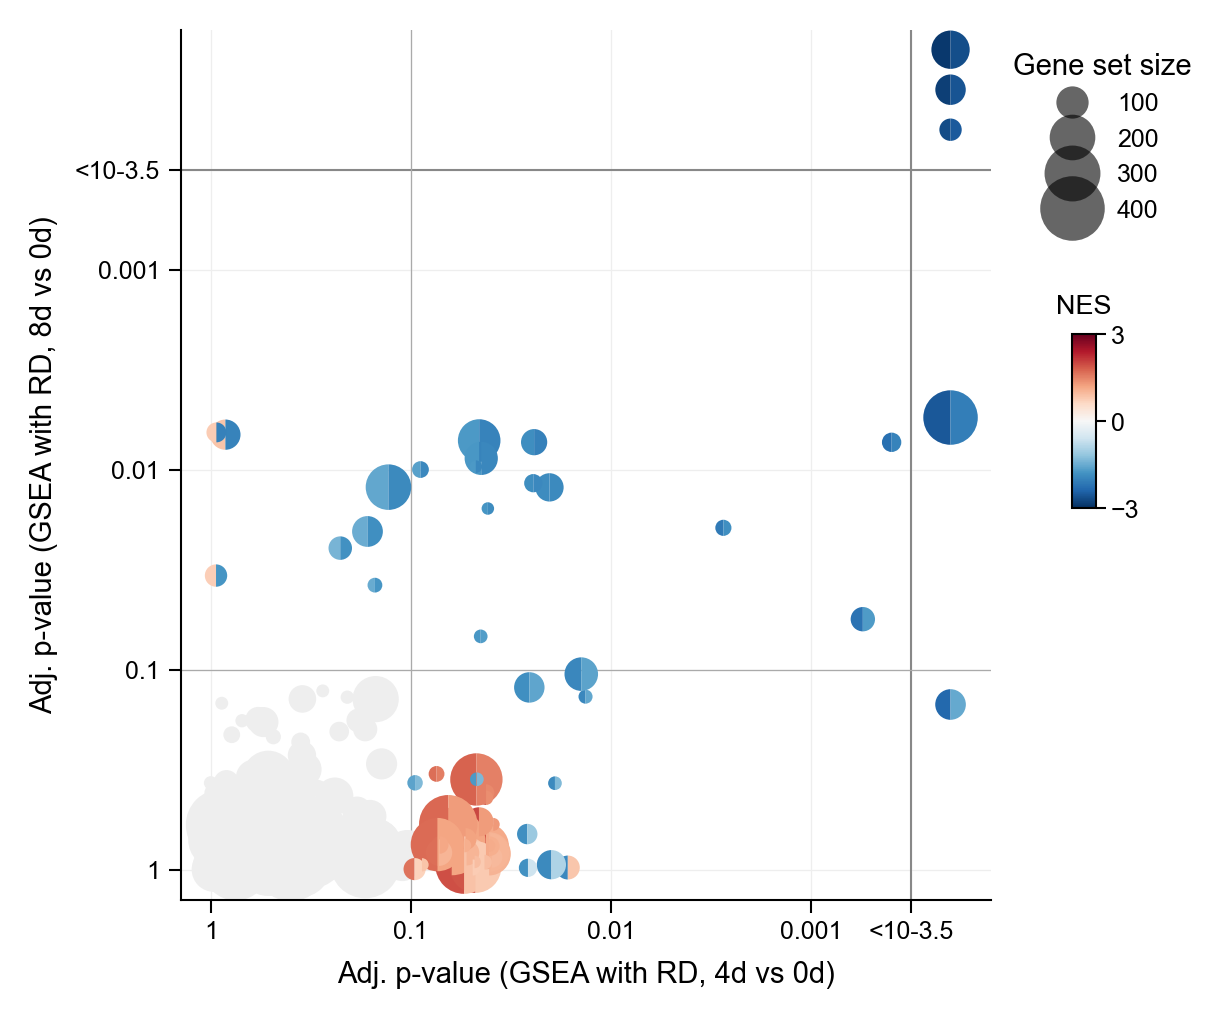

In [11]:
Sig_plot_data2 = Sig_plot_data.copy()
Sig_plot_data2.loc[0, '-log10FDR_8d'] = Sig_plot_data2.loc[2, '-log10FDR_8d'] + 0.4 # IMM protein complex
Sig_plot_data2.loc[1, '-log10FDR_8d'] = Sig_plot_data2.loc[2, '-log10FDR_8d'] + 0.2 # Respirasome

dot_size_factor = 0.6

sF = 2 # Size factor
wgap = 0.1
hgap = 0.1
nrow, ncol = 1, 1

height_ratios = [4.35/3]*nrow
width_ratios  = [4.05/3]*ncol

fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF
fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    height_ratios=height_ratios,
                    width_ratios=width_ratios,
                    left=0, right=1, bottom=0, top=1,
                    wspace=wgap, hspace=hgap)

ax = fig.add_subplot(grid[0,0])

vmin, vmax = -3, 3

ax.axvline(3.5, c='#888888', ls='-', lw=0.5, zorder=1)
ax.axhline(3.5, c='#888888', ls='-', lw=0.5, zorder=1)
ax.axvline(1, c='#AAAAAA', ls='-', lw=0.3, zorder=1)
ax.axhline(1, c='#AAAAAA', ls='-', lw=0.3, zorder=1)

sct = ax.scatter(NoSig_plot_data['-log10FDR_4d'], NoSig_plot_data['-log10FDR_8d'],
           s=NoSig_plot_data['GS size']*dot_size_factor, 
           marker='o',
           c='#EEEEEE', #"#F6F4EB",
           lw=0, edgecolors='k',
           rasterized=True)

sct_ = ax.scatter(Sig_plot_data2['-log10FDR_4d'], Sig_plot_data2['-log10FDR_8d'],
           s=Sig_plot_data2['GS size']*dot_size_factor, 
           marker=mpl.markers.MarkerStyle('o', fillstyle='left'),
           c=Sig_plot_data2['NES_4d'], cmap="RdBu_r", vmin=vmin, vmax=vmax,
           lw=0, edgecolors='k')

sct_ = ax.scatter(Sig_plot_data2['-log10FDR_4d'], Sig_plot_data2['-log10FDR_8d'],
           s=Sig_plot_data2['GS size']*dot_size_factor, 
           marker=mpl.markers.MarkerStyle('o', fillstyle='right'),
           c=Sig_plot_data2['NES_8d'], cmap="RdBu_r", vmin=vmin, vmax=vmax,
           lw=0, edgecolors='k')


ax.set_xlim(-0.15, 3.9)
ax.set_ylim(-0.15, 4.2)
ax.set_yticks([0, 1, 2, 3, 3.5])
ax.set_yticklabels([1, 0.1, 0.01, 0.001, "<10-3.5"])
ax.set_xticks([0, 1, 2, 3, 3.5])
ax.set_xticklabels([1, 0.1, 0.01, 0.001, "<10-3.5"])
ax.tick_params(width=0.5, length=3, pad=2)

ax.grid(c='#EEEEEE', ls='-', lw=0.3)

ax.set_xlabel('Adj. p-value (GSEA with RD, 4d vs 0d)')
ax.set_ylabel('Adj. p-value (GSEA with RD, 8d vs 0d)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

cbar = plt.colorbar(sct_, ax=ax, cax = ax.inset_axes([1.1, 0.45, 0.03, 0.2]), orientation='vertical')
cbar.ax.set_title('NES', pad=5, fontsize=6.5)
cbar.ax.set_yticks([-3, 0, 3])
cbar.ax.tick_params(width=0.5, length=2.5, pad=1)

handles, labels = sct.legend_elements(prop="sizes", alpha=0.6, num=5)
labels = [int(int(''.join(i for i in x if i.isdigit())) / dot_size_factor) for x in labels]
ax.legend(handles, labels, loc="upper left", bbox_to_anchor=(1, 1), ncol=1, title="Gene set size", frameon = False)

plt.savefig('GSEA_NES_scatter_type2.pdf', bbox_inches='tight')
plt.show()